<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Исследование-объектов-Нмаркет-Про" data-toc-modified-id="Исследование-объектов-Нмаркет-Про-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Исследование объектов Нмаркет Про</a></span><ul class="toc-item"><li><span><a href="#Проверка-дубликатов" data-toc-modified-id="Проверка-дубликатов-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Проверка дубликатов</a></span></li></ul></li></ul></div>

 # Исследование объектов Нмаркет Про

Задачи исследования

- Количество квартир имеющихся в продаже в сервисе.
  - Сколько студий, 1к, 2к, 3к, 4к >
  
- Распределение новостроек по районам
- Распределение цен по районам
- Зависимость цен от этажности
- Зависимость цен от застройщика

Импортируем необходимые библиотеки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('datasets/nmarket.csv')

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [4]:
display(df.sample(5))

,id,type,property_type,category,creation_date,last_update_date,manually_added,mortgage,haggle,renovation,description,new_flat,rooms,balcony,bathroom_unit,floor,floors_total,building_name,building_type,building_phase,building_section,built_year,ready_quarter,lift,parking,ceiling_height,nmarket_complex_id,nmarket_building_id,country,region,district,locality_name,sub_locality_name,non_admin_sub_locality,address,apartment,latitude,longitude,name,time_on_foot,time_on_transport,price,area,living_space,kitchen_space
133,134,продажа,жилая,квартира,2021-06-04T11:28:06+00:00,2021-06-07T15:56:00+00:00,0,False,True,Подготовка под чистовую отделку,"Квартира: 2 ккв 50, 72 кв.м., 4 этаж в компле...",1,2,лоджия,раздельный,4,12,ID Murino 2,кирпично-монолитный,Очередь 1,Корпус 3,2023,4,1,1.0,3.00,76109,77394,Россия,Ленинградская область,NaN,Лаврики,Всеволожский,Всеволожский,"Лаврики дер.,",24,60.069523,30.439588,Девяткино,NaN,5.0,6086380,50.72,24.88,10.29
1978,1979,продажа,жилая,квартира,2019-09-11T07:27:23+00:00,2021-06-01T04:29:47+00:00,0,True,False,Черновая отделка,"Квартира: 1 ккв 41, 74 кв.м., 1 этаж в компле...",1,1,балкон,раздельный,1,4,Юттери,панельный,Очередь 5,Корпус 4,2021,3,1,1.0,2.72,668,63124,Россия,Санкт-Петербург,Колпинский район,Колпино,NaN,Колпинский,"Понтонная ул.,",120,59.754678,30.630871,Звездная,NaN,15.0,6202564,41.74,15.80,11.13
557,558,продажа,жилая,квартира,2020-01-27T19:09:37+00:00,2021-06-01T07:38:21+00:00,0,True,False,Подготовка под чистовую отделку,"Квартира: 2 ккв 69, 55 кв.м., 5 этаж в компле...",1,2,лоджия,раздельный,5,12,Модум,кирпично-монолитный,Очередь 1,Корпус 1,2022,4,1,1.0,2.75,63896,63895,Россия,Санкт-Петербург,NaN,Санкт-Петербург,Приморский,Приморский,"Глухарская ул.,",98,60.033244,30.206050,Комендантский проспект,NaN,10.0,13583115,69.55,26.57,17.08
13,14,продажа,жилая,квартира,2021-05-26T20:06:07+00:00,2021-06-09T07:03:00+00:00,0,True,False,Черновая отделка,"Квартира: 1 ккв 32, 15 кв.м., 23 этаж в компл...",1,1,лоджия,совмещенный,23,23,БелАрт,кирпично-монолитный,Очередь 1,Корпус 1,2023,4,1,1.0,2.75,77322,77321,Россия,Санкт-Петербург,NaN,Санкт-Петербург,Калининский,Калининский,"Полюстровский пр., д. 13",178,59.981839,30.365619,Лесная,20.0,NaN,8139372,32.15,14.30,10.14
1592,1593,продажа,жилая,квартира,2019-05-16T14:40:05+00:00,2021-06-04T05:20:51+00:00,0,True,False,"Отделка ""под ключ""","Студия: 25, 40 кв.м., 13 этаж в комплексе St...",1,1,нет,совмещенный,13,20,Start,монолитный,Очередь 1,Корпус 1,2021,4,1,1.0,2.80,62275,62257,Россия,Санкт-Петербург,NaN,Санкт-Петербург,Выборгский,Выборгский,"Энгельса пр., д. 174/лит. А",606,60.071612,30.342862,Парнас,5.0,NaN,3383473,25.40,22.20,22.20


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2005 entries, 0 to 2004
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      2005 non-null   int64  
 1   type                    2005 non-null   object 
 2   property_type           2005 non-null   object 
 3   category                2005 non-null   object 
 4   creation_date           2005 non-null   object 
 5   last_update_date        2005 non-null   object 
 6   manually_added          2005 non-null   int64  
 7   mortgage                2005 non-null   bool   
 8   haggle                  2005 non-null   bool   
 9   renovation              2000 non-null   object 
 10  description             2005 non-null   object 
 11  new_flat                2005 non-null   int64  
 12  rooms                   2005 non-null   int64  
 13  balcony                 2000 non-null   object 
 14  bathroom_unit           2000 non-null   

In [6]:
df = df.rename(columns={"name": "metro"})

In [7]:
df['creation_date'] = pd.to_datetime(df['creation_date'], yearfirst=True)
df['last_update_date'] = pd.to_datetime(df['creation_date'], yearfirst=True)

In [8]:
print(df.creation_date.max())
print(df.creation_date.min())
df.creation_date.max()-df.creation_date.min()

2021-06-09 08:35:58+00:00
2019-03-07 13:39:55+00:00


Timedelta('824 days 18:56:03')

## Проверка дубликатов

Проверим соответствия между районами

In [27]:
print(df.district.unique())
print()
print(df.sub_locality_name.unique())
print()
print(df.non_admin_sub_locality.unique())

[nan 'Тосненский район' 'Всеволожский район' 'Петродворцовый район'
 'Приморский район' 'Пушкинский район' 'Гатчинский район'
 'Ломоносовский район' 'Колпинский район']

['Калининский' 'Московский' 'Выборгский' 'Всеволожский' nan
 'Красногвардейский' 'Адмиралтейский' 'Приморский' 'Фрунзенский'
 'Кировский' 'Красносельский' 'Гатчинский']

['Калининский' 'Московский' 'Выборгский' 'Всеволожский' 'Тосненский'
 'Красногвардейский' 'Адмиралтейский' 'Приморский' 'Петродворцовый'
 'Пушкинский' 'Фрунзенский' 'Гатчинский' 'Кировский' 'Красносельский'
 'Ломоносовский' 'Колпинский']


In [39]:
df.district = df.district.fillna(' район')

In [49]:
df.district = df.district.apply(lambda x: x.replace(' район', '', 1))

In [50]:
df.sub_locality_name = df.sub_locality_name.fillna('')

In [88]:
data = {'district': df['district'], 'sub_locality_name': df['sub_locality_name'],
        'non_admin_sub_locality': df['non_admin_sub_locality']}
df2 = pd.DataFrame.from_dict(data)

In [95]:
print(df2[df2['district']!=df2['sub_locality_name']].shape)
print(df2[df2['district']==df2['sub_locality_name']].shape)

(2005, 3)
(0, 3)


In [104]:
df2[df2['district']!=df2['sub_locality_name']]

,district,sub_locality_name,non_admin_sub_locality
0,,Калининский,Калининский
1,,Калининский,Калининский
2,,Калининский,Калининский
3,,Калининский,Калининский
4,,Калининский,Калининский
...,...,...,...
2000,Колпинский,,Колпинский
2001,Колпинский,,Колпинский
2002,Колпинский,,Колпинский
2003,Колпинский,,Колпинский


In [102]:
lst_disrict = []
lst_sub_locality_name = []
for disrict in df.district.unique():
    if disrict in df.sub_locality_name.unique():
        lst_disrict.append(disrict)
    else:
        lst_sub_locality_name.append(disrict)

print('район содержится также в sub_locality_name', lst_disrict)
print('район содержится только в disrict', lst_sub_locality_name)

район содержится также в sub_locality_name ['', 'Всеволожский', 'Приморский', 'Гатчинский']
район содержится только в disrict ['Тосненский', 'Петродворцовый', 'Пушкинский', 'Ломоносовский', 'Колпинский']


In [53]:
for disrict in df.sub_locality_name.unique():
    if disrict in df.non_admin_sub_locality.unique():
        print(disrict)

Калининский
Московский
Выборгский
Всеволожский
Красногвардейский
Адмиралтейский
Приморский
Фрунзенский
Кировский
Красносельский
Гатчинский


In [17]:
exclude_columns = ['id', 'creation_date', 'last_update_date', 'description',
                   'nmarket_complex_id', 'nmarket_building_id', 'latitude',
                   'longitude', 'price', 'area', 'living_space', 'kitchen_space',
                   'apartment']

In [18]:
def check_uni_qaulity(column_name, exclude_columns):
    if column_name not in exclude_columns:
        print(column)
        display(df[column_name].value_counts())            
        df[column_name].value_counts().plot(kind='bar', 
                             title=column_name)
        plt.show()
            
        print('='*100)

type


продажа    2005
Name: type, dtype: int64

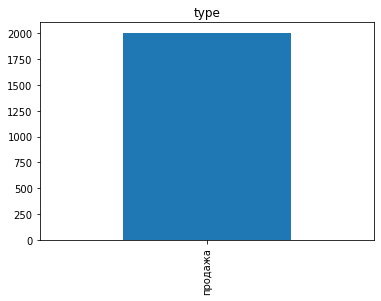

property_type


жилая    2005
Name: property_type, dtype: int64

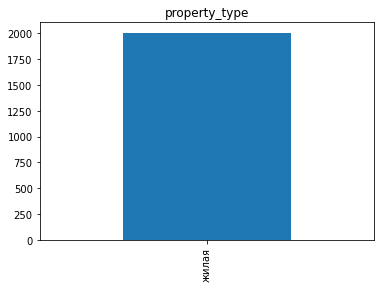

category


квартира    2005
Name: category, dtype: int64

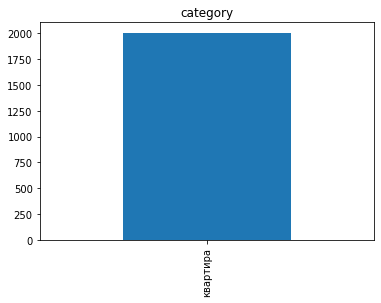

manually_added


0    2005
Name: manually_added, dtype: int64

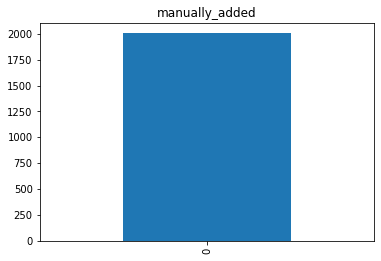

mortgage


True     1631
False     374
Name: mortgage, dtype: int64

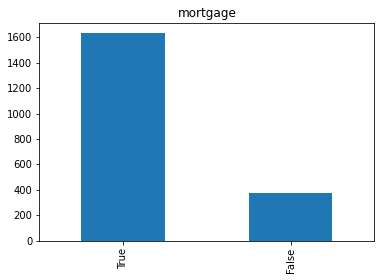

haggle


False    1650
True      355
Name: haggle, dtype: int64

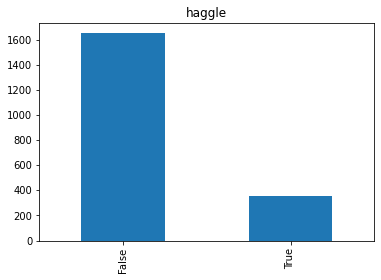

renovation


Подготовка под чистовую отделку    977
Отделка "под ключ"                 520
Черновая отделка                   488
Чистовая отделка                    14
Без отделки                          1
Name: renovation, dtype: int64

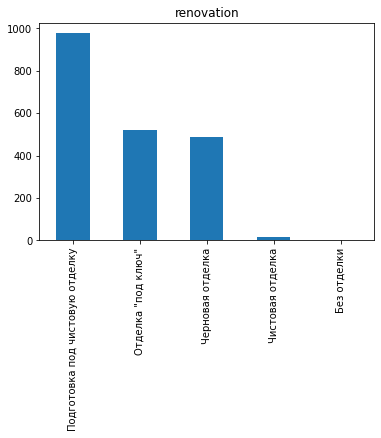

new_flat


1    2005
Name: new_flat, dtype: int64

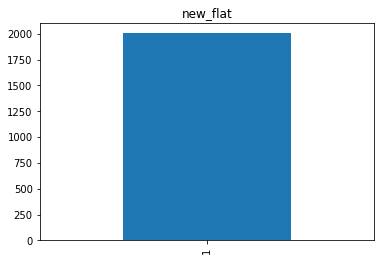

rooms


1    1154
2     573
3     206
4      48
5      16
6       8
Name: rooms, dtype: int64

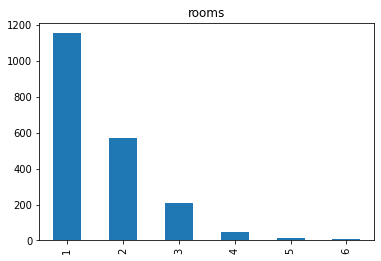

balcony


лоджия            1026
нет                421
балкон             278
2 лоджии           140
2 балкона           59
балкон+терраса      42
терраса             31
эркер                3
Name: balcony, dtype: int64

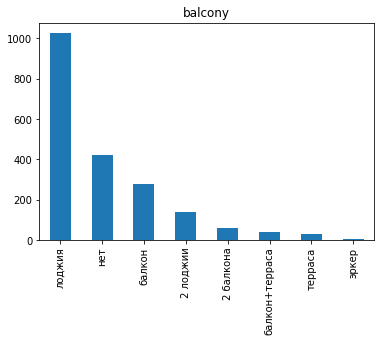

bathroom_unit


совмещенный    871
раздельный     611
2              518
Name: bathroom_unit, dtype: int64

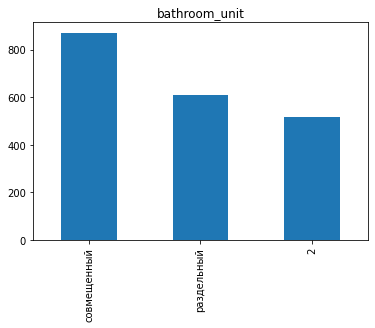

floor


2     225
3     184
4     166
5     140
7     139
1     128
6     125
12    113
8     109
11    107
9     101
10     99
13     63
20     58
14     43
19     42
16     41
17     37
18     35
15     28
22      6
21      4
23      3
24      3
27      2
26      2
25      2
Name: floor, dtype: int64

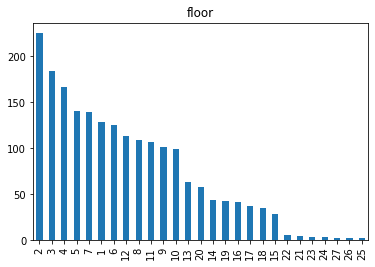

floors_total


12    808
20    310
13    185
4     153
18    131
9      85
11     63
8      55
23     51
27     49
3      37
6      28
7      25
2      15
1       5
5       5
Name: floors_total, dtype: int64

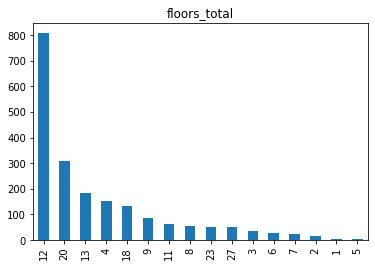

building_name


Модум                452
ID Murino 2          314
Start                216
NEW TIME             179
Valo                 131
Ultra City            94
LATTE                 65
ID Парк Победы        63
Юттери                54
ЯСНО.Янино            54
БелАрт                50
Континенты            49
Moskovsky AVENIR      36
Resort                32
Аура                  28
Nordic                27
NEWПитер              22
Энфилд                22
Jaanila Drive         20
Идеалист              16
SHINE                 12
Артхаус                9
IQ Гатчина             8
Duderhof club          8
Б57                    7
Pushkin                7
Новое Купчино          6
Villas Spa             6
INKERI                 5
Петергофские дачи      5
Лахта Парк             5
Есенин Village         1
Лахта Плаза            1
Трилогия               1
Name: building_name, dtype: int64

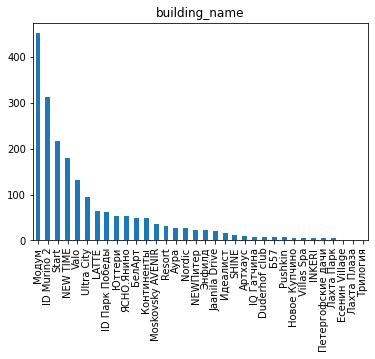

building_type


кирпично-монолитный    1207
монолитный              642
панельный                87
кирпичный                56
монолитно-каркасный       7
каркасно-блочный          5
блочный                   1
Name: building_type, dtype: int64

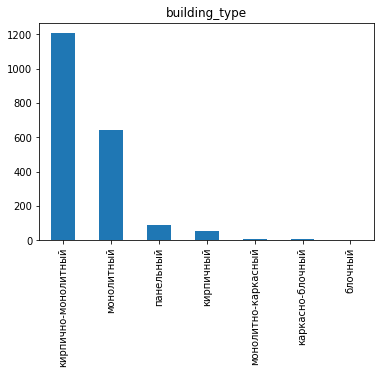

building_phase


Очередь 1    1285
Очередь 5     277
Очередь 2     264
Очередь 3     179
Name: building_phase, dtype: int64

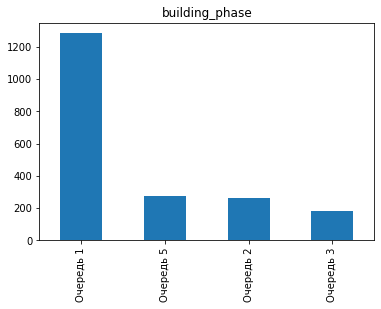

building_section


Корпус 3                577
Корпус 1                462
Корпус 2                378
Корпус 4                129
Корпус 5 этап 2          57
Корпус 2 (Mercure)       56
Корпус 6 этап 2          37
Корпус 109               34
Корпус Г                 28
Корпус 6.1               25
Корпус 110               22
Корпус В                 21
Корпус 6.3               18
Корпус 2.1               15
Корпус 9                 13
Корпус 94.2              13
Корпус 6.2               11
Корпус 8                 10
Корпус 5                  9
Корпус 94.1               9
Корпус 116                9
Корпус Таунхаусы          8
Корпус сити-виллы 3Б      5
Корпус 100.2              5
Корпус 93                 4
Корпус 91                 4
Корпус 82                 4
Корпус 86                 4
Корпус 83                 4
Корпус 92.2               4
Корпус 98                 3
Корпус 106                3
Корпус 101                3
Корпус 97                 3
Корпус 92.1               3
Корпус 57-95 участки

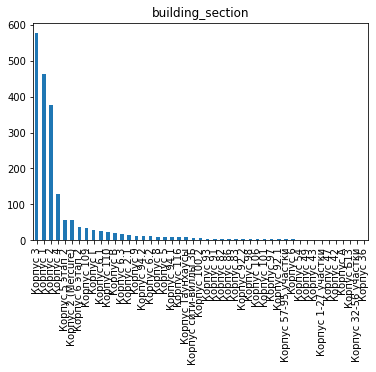

built_year


2022    1083
2021     411
2023     399
2024      63
2020      31
2014       9
2015       5
2017       1
2019       1
2018       1
2016       1
Name: built_year, dtype: int64

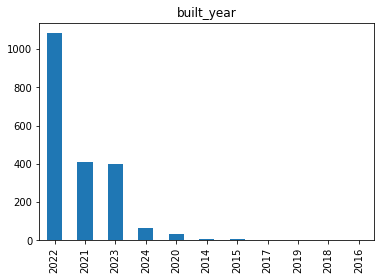

ready_quarter


4    1141
3     599
2     171
1      94
Name: ready_quarter, dtype: int64

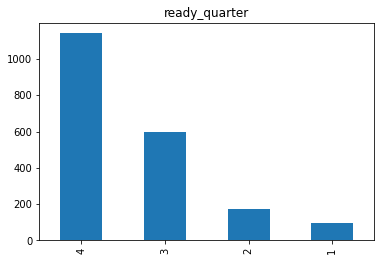

lift


1    2005
Name: lift, dtype: int64

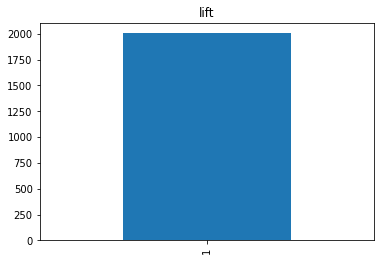

parking


1.0    1944
Name: parking, dtype: int64

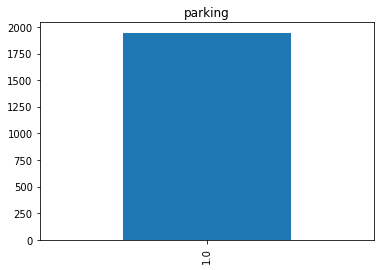

ceiling_height


2.75    711
3.00    412
0.00    277
2.80    228
2.70    140
2.60     91
3.20     67
2.72     60
2.85     11
3.70      8
Name: ceiling_height, dtype: int64

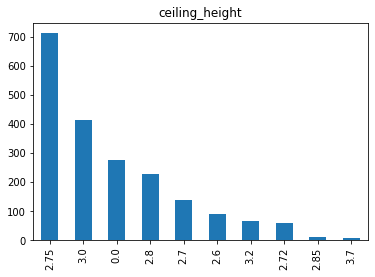

country


Россия    2005
Name: country, dtype: int64

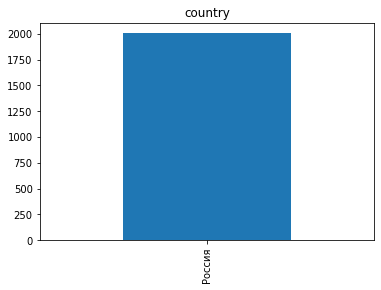

region


Санкт-Петербург          1427
Ленинградская область     578
Name: region, dtype: int64

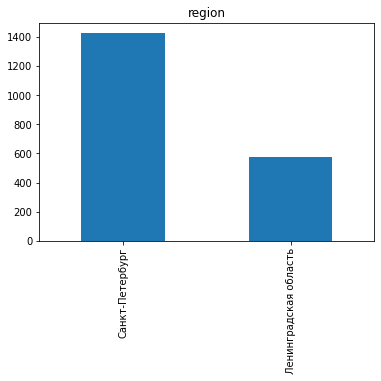

district


Всеволожский район      96
Колпинский район        54
Ломоносовский район     22
Гатчинский район         8
Петродворцовый район     5
Приморский район         5
Пушкинский район         5
Тосненский район         1
Name: district, dtype: int64

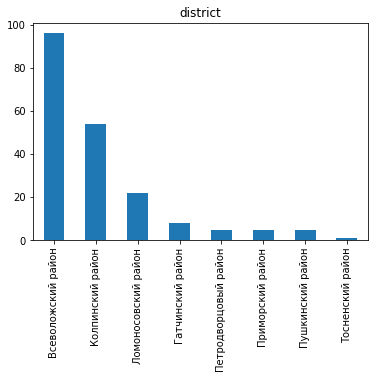

locality_name


Санкт-Петербург    1358
Лаврики             314
Красницы            137
Заневское            54
Колпино              54
Бугры                22
Новоселье            22
Янино-1              20
Гатчина               8
Петергоф              5
Лахта                 5
Пушкин                5
Аннолово              1
Name: locality_name, dtype: int64

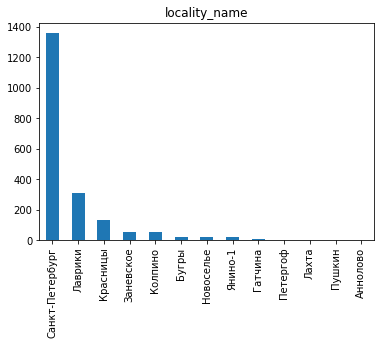

sub_locality_name


Приморский           726
Всеволожский         314
Выборгский           293
Фрунзенский          137
Гатчинский           137
Московский           106
Калининский           50
Адмиралтейский        25
Красногвардейский     12
Красносельский         8
Кировский              1
Name: sub_locality_name, dtype: int64

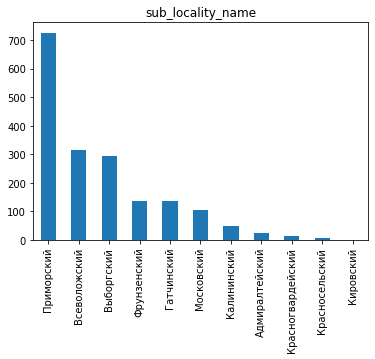

non_admin_sub_locality


Приморский           731
Всеволожский         410
Выборгский           293
Гатчинский           145
Фрунзенский          137
Московский           106
Колпинский            54
Калининский           50
Адмиралтейский        25
Ломоносовский         22
Красногвардейский     12
Красносельский         8
Петродворцовый         5
Пушкинский             5
Тосненский             1
Кировский              1
Name: non_admin_sub_locality, dtype: int64

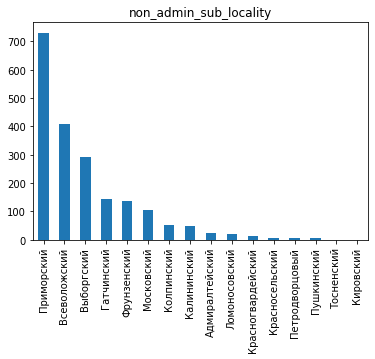

address


Глухарская ул.,                                  725
Лаврики дер.,                                    314
Энгельса пр.,  д. 174/лит. А                     216
Салова ул.,  д. 61/А                             131
Кристальная наб.,                                 92
Сызранская ул.,  д. 23/А                          63
Понтонная ул.,                                    54
Янино-2 уч-к,                                     54
Полюстровский пр.,  д. 13                         50
Брюлловская ул. / Архитектора Белова ул.,         49
Киевская ул.,  д. 5/6                             36
Красницы дер.,                                    32
Зеленогорская ул.,  д. 3 лит. А                   28
Янино-1 п.,                                       20
Малодетскосельский пр.,  д. 40                    16
Шекспира ул.,  д. 7                               15
Таллинская ул.,  д. 11/А                          12
Невская ул.,  д. 6                                12
Невская ул.,  д. 4                            

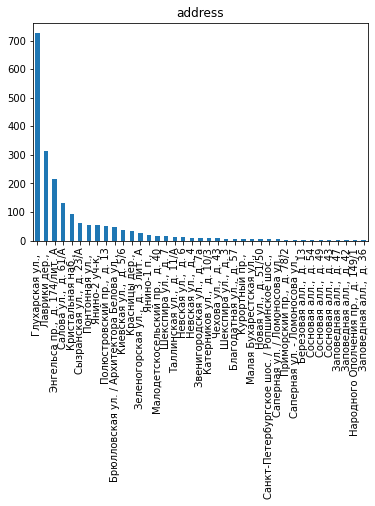

metro


Комендантский проспект      725
Девяткино                   336
Парнас                      265
Купчино                     138
Бухарестская                131
Ладожская                    74
Электросила                  63
Звездная                     62
Лесная                       50
Фрунзенская                  36
Проспект Ветеранов           31
Пионерская                   28
Технологический институт     16
Новочеркасская               12
Звенигородская                9
Парк Победы                   7
Дунайская                     6
Московская                    5
Ленинский проспект            5
Старая деревня                5
Name: metro, dtype: int64

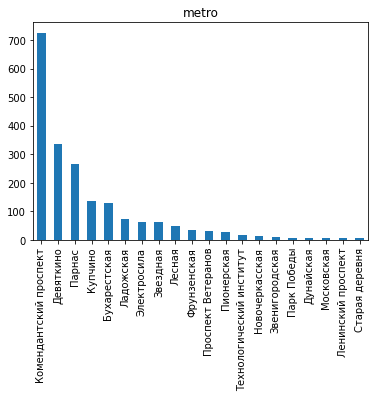

time_on_foot


5.0     216
3.0     131
20.0    128
15.0     70
10.0     58
8.0      12
6.0       9
Name: time_on_foot, dtype: int64

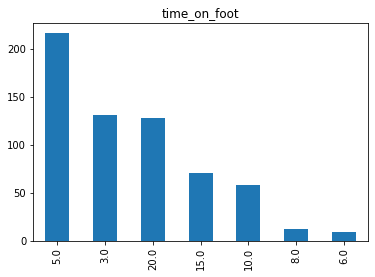

time_on_transport


10.0    588
5.0     314
15.0    233
60.0    137
20.0     70
40.0     22
30.0     10
25.0      5
35.0      1
Name: time_on_transport, dtype: int64

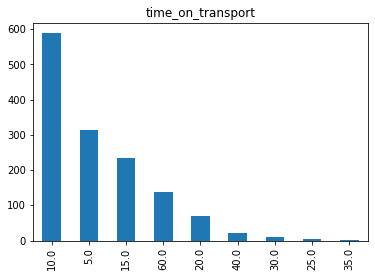

In [19]:
for column in df.columns: 
    check_uni_qaulity(column, exclude_columns)
    

In [12]:
df.shape

(2005, 45)

In [13]:
df.locality_name.unique()

array(['Санкт-Петербург', 'Лаврики', 'Аннолово', 'Бугры', 'Петергоф',
       'Лахта', 'Пушкин', 'Заневское', 'Янино-1', 'Гатчина', 'Красницы',
       'Новоселье', 'Колпино'], dtype=object)

In [14]:
df.building_name.unique()

array(['БелАрт', 'Moskovsky AVENIR', 'Аура', 'ID Murino 2',
       'ID Парк Победы', 'Есенин Village', 'SHINE', 'Артхаус', 'Модум',
       'Энфилд', 'Петергофские дачи', 'Лахта Парк', 'INKERI',
       'Ultra City', 'NEW TIME', 'Valo', 'ЯСНО.Янино', 'Jaanila Drive',
       'IQ Гатчина', 'Трилогия', 'Duderhof club', 'Идеалист',
       'Новое Купчино', 'Resort', 'Villas Spa', 'Start', 'NEWПитер',
       'Pushkin', 'Nordic', 'LATTE', 'Лахта Плаза', 'Б57', 'Континенты',
       'Юттери'], dtype=object)

In [15]:
int(df.shape[0]/df.building_name.nunique())

58

In [16]:
int(df.shape[0]/df.locality_name.nunique())

154